# Calculate Localization Posterior

To continue developing our intuition for this filter and prepare for later coding exercises, let's walk through calculations for determining posterior probabilities at several pseudo positions x, for a single time step. We will start with a time step after the filter has already been initialized and run a few times. We will cover initialization of the filter in an upcoming concept.

In [6]:
import pandas as pd

In [19]:
pseudo_position_x=[1,2,3,4,5,6,7,8,9]
P_location=[1.67E-02,3.86E-02,4.90E-02,3.86E-02,1.69E-02, 6.51E-03,None,3.86E-02]
P_observation_location=[0.00E+00,6.99E-03,8.52E-02,None,3.13E-02,9.46E-04,3.87E-06,0.00E+00]
Raw_P_location_observation=[0.00E+00,None,4.18E-03,5.42E-03,5.31E-04,6.16E-06,6.55E-08,0.00E+00]
Normalized_P_location_observation=[0.00E+00,2.59E-02,4.01E-01,5.21E-01,5.10E-02,None,6.29E-06,0.00E+00]

In [39]:

df=pd.DataFrame(list(zip(pseudo_position_x,P_location,P_observation_location,Raw_P_location_observation,Normalized_P_location_observation)),
                columns =['pseudo_position (x)', ' P(location)  P(a)','P(observation∣location)  P(b|a)','Raw P(location∣observation) P(b|a)*P(a)= P(Posterior)','Normalized P(location∣observation)  P(b|a)*P(a)/P(b) =P(a|b)']) 

In [40]:
df.set_index('pseudo_position (x)')

,P(location) P(a),P(observation∣location) P(b|a),Raw P(location∣observation) P(b|a)*P(a)= P(Posterior),Normalized P(location∣observation) P(b|a)*P(a)/P(b) =P(a|b)
pseudo_position (x),,,,
1,0.01670,0.000000,0.000000e+00,0.000000
2,0.03860,0.006990,NaN,0.025900
3,0.04900,0.085200,4.180000e-03,0.401000
4,0.03860,NaN,5.420000e-03,0.521000
5,0.01690,0.031300,5.310000e-04,0.051000
6,0.00651,0.000946,6.160000e-06,NaN
7,NaN,0.000004,6.550000e-08,0.000006
8,0.03860,0.000000,0.000000e+00,0.000000


**The Raw P(location|observation)** is the result prior to dividing by the total probability of P(observation), the P(b) term (denominator) of the generalized Bayes`rule. 

**The normalized P(location|observation)** is the result of after dividing by P(observation).

Remember the general form for Bayes' Rule:


<p align="right"> <img src="./img/7.jpg" style="right;" alt="the general form for Bayes' Rule" width="800" height="400"> </p> 


With respect to localization, these terms are:

* P(location∣observation): This is P(a|b), the normalized probability of a position given an observation (posterior)
   
* P(observation∣location): This is P(b|a), the probability of an observation given a position (likelihood)
 
* P(location): This is P(a), the prior probability of a position
   
* P(observation): This is P(b), the total probability of an observation


**What is P(observation∣location) for x = 4? Write the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15**

In [1]:
#To determine the observation probability divide the P(posterior) by P(position):
#1.40E-1

from decimal import Decimal

'%.2E' % Decimal(5.42E-3/3.86E-2)
#print(5.42E-3/3.86E-2)

'1.40E-01'

**What is the raw posterior probability P(location|observation) for x = 2? Be sure to put the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.**

In [42]:
#P(location) P(a)*P(observation∣location) P(b|a)
#print(0.03860*0.006990)
'%.2E'% Decimal(0.03860*0.006990)

'2.70E-04'

**What is the normalized posterior probability for x = 6? Write the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.**

To determine the normalized posterior probability, first sum the raw P(Posterior) to get the total:

0.00E+00 + 2.70E-04 + 4.18E-03 + 5.42E-03 + 5.31E-04 + 6.16E-06 + 6.55E-08 + 0.00E+00 = 1.04E-02

Next, divide the P(Posterior) by the sum:

6.16E-06/1.04E-02 = 5.92E-4

**What is the position probability for x = 7? Write your answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15**

In [45]:
#6.550000e-08 /0.000004 
'%.2E' %Decimal(6.550000e-08/0.000004 )
#To determine the position probability divide P(posterior) by P(observation):
#3.87E-06 * 6.55E-08 = 1.69E-2 

'1.64E-02'

# Initialize Belief State

In [46]:
a=[0, 0, 0, 1.11E-01, 1.11E-01, 1.11E-01, 0, 0, 1.11E-01, 1.11E-01, 1.11E-01, 0, 0, 0, 0, 0, 0, 0, 1.11E-01, 1.11E-01, 1.11E-01, 0, 0, 0, 0]

In [47]:
len(a)

25

In [66]:
'%.2E' %Decimal((1.0)/9 )

'1.11E-01'

To reinforce this concept, let's practice with a quiz.

    map size: 100 meters
    landmark positions: {8, 15, 30, 70, 80}
    position standard deviation: 2 meters

Assuming we are parked next to a landmark, answer the following questions about our initial belief state.

**What is our initial probability (initial belief state) for position 11? If the answer is non-zero, enter it in scientific notation with an accuracy of two decimal places, for example 3.14E-15.**


In [67]:
#Is position 11 within 2 meters of a landmark? no then 0
print('answer=',0)

answer= 0


**What is our initial probability (initial belief state) for position 71? If the answer is non-zero, enter it in scientific notation with an accuracy of two decimal places, for example 3.14E-15.**

In [68]:
#the landmark position and two position on either side)  number of landmark positions*5
'%.2E' %Decimal((1.0)/25 )

'4.00E-02'

To determine the initial probability we will divide 1.0 by the total number of positions within 2 meters of a landmark. In this case we have 5 landmarks and a position standard deviation of 2.0 meters. This gives us 5 potentially occupied positions per landmark (the landmark position and 2 each side), yielding 25 potentially occupied positions (5 landmarks * 5 positions/landmark).

# Motion Model Probability

In [24]:
pseudo_position_x1=[7,7,7,7,7,7,7,7]
pre_pseudo_position=[1,2,3,4,5,6,7,8]
delta_position=[6,5,4,None,2,1,0,-1]
P_transition=[1.49E-06,1.34E-04,4.43E-03,5.40E-02,None,3.99E-01,2.42E-01,5.40E-02]
bel_x_t_1=[5.56E-02,5.56E-02,5.56E-02,0.00E+00,0.00E+00,0.00E+00,None,1.79E-03]
P_position=[8.27E-08,7.44E-06,2.46E-04,0.00E+00,0.00E+00,0.00E+00,1.66E-03,9.67E-05]

In [12]:
df1=pd.DataFrame(list(zip(pseudo_position_x1,pre_pseudo_position,delta_position,P_transition,bel_x_t_1,P_position)),
                columns =['pseudo_position_x1', ' pre_pseudo_position',
                          'delta_position','P_transition','bel_x_t_1','P_position']) 

In [13]:
df1

,pseudo_position_x1,pre_pseudo_position,delta_position,P_transition,bel_x_t_1,P_position
0,7,1,6.0,0.000001,0.05560,8.270000e-08
1,7,2,5.0,0.000134,0.05560,7.440000e-06
2,7,3,4.0,0.004430,0.05560,2.460000e-04
3,7,4,NaN,0.054000,0.00000,0.000000e+00
4,7,5,2.0,NaN,0.00000,0.000000e+00
5,7,6,1.0,0.399000,0.00000,0.000000e+00
6,7,7,0.0,0.242000,NaN,1.660000e-03
7,7,8,-1.0,0.054000,0.00179,NaN


Delta Position

What is difference in position for an x of 7 and a pre-pseudo position of 4?



In [14]:
print('pseudo_position - pre-pseudo_position =', 7 - 4 )

pseudo_position - pre-pseudo_position = 3



Transition Probability

Use [normpdf](https://github.com/A2Amir/Markov-Localization-and-the-Kidnapped-Vehicle-/blob/master/C%2B%2B/DetermineProbabilities.cpp)  to determine the transition probability for x = 7 and a pre-pseudo_position of 5, and a control parameter of 1, and a standard deviation of 1. The transition probability can be determined through normpdf(delta_position, control_parameter, position_stdev). The answer must be in scientific notation with two decimal place accuracy, for example 3.14E-15.


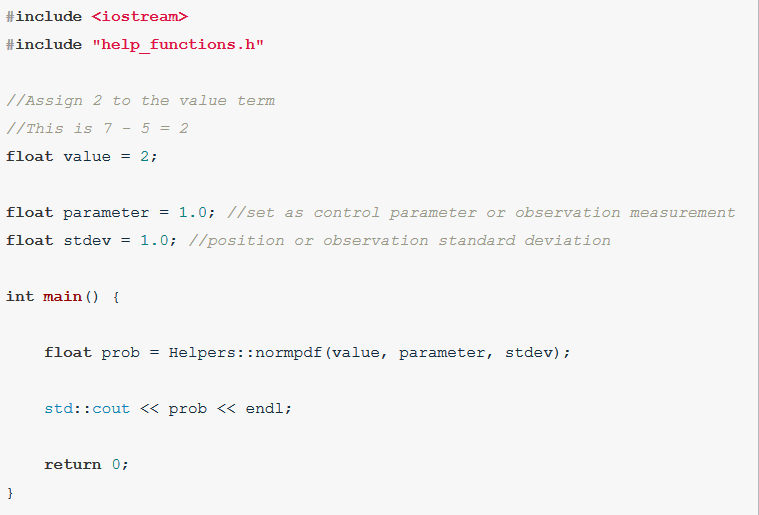

Determine the belief state

In practice we only set our initial belief state, but making the following calculation is helpful in building intuition. What is the belief state bel(xt−1) for the penultimate row of our table above? Write the answer in scientific notation with an accuracy of two decimal places, for example 3.14E-15.


In [16]:
#Our positon probability is the product of the transition probability and our belief state at t - 1. Rearranging yields:
print('%.2E' %Decimal((1.66E-03/2.42E-01 )))
# = 6.86E-03

6.86E-03


Position Probability

What is the discretized position probability for x = 7 and a pre-pseudo_position of 8, given the belief state in the table above?

In [19]:
print('%.2E' %Decimal((5.40E-02 *1.79E-03)))

#Our positon probability is the product of the transition probability and our belief state for our pre-pseudo position.

#5.40E-02 * 1.79E-03 = 9.66E-05

9.67E-05


In [25]:
x=sum(P_position)+9.67E-05

print('%.2E' %Decimal((x)))


2.01E-03


By summing the discrete probabilities from the table, we obtain the total probability, which estimates the probability from a continuous function.

8.27E-08 + 7.44E-06 + 2.46E-04 + 0.00E+00 + 0.00E+00 + 0.00E+00 + 1.66E-03 + 9.66E-05 = 2.02E-03